# Week 4 - Principal Component Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysnptools.snpreader import Bed

This week we will be looking at Principal Component Analysis (PCA) algorithm. The algorith is a technique used for applications like dimensionality reduction, lossy data compression, feature extraction and data visualization. 

The PCA performs the orthogonal projection of the data onto a lower dimensional linear space. The goal is to find the directions (principal components) in which the variance of the data is maximized.
An alternative definition of PCA is based on minimizing the sum-of-sqares of the projection errors.

For the deriviation of the PCA algorithm refer to https://www.microsoft.com/en-us/research/wp-content/uploads/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf

# PCA algorithm step by step

1. Calculate the mean of the data
$$ \mathbf{\bar{x}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x}_i $$

2. Calculate the covariance matrix $\mathbf{S}$ of the data:
$$ \mathbf{S} = \frac{1}{N-1} \sum_{i=1}^{N} (\mathbf{x}_i - \mathbf{\bar{x}})(\mathbf{x}_i - \mathbf{\bar{x}})^T $$

Both the mean and the covariance matrix are calculated by `empirical_covariance` function. 

3. Calculate the eigenvalues $\lambda_i$ and eigenvectors $\mathbf{u}_i$ of the covariance matrix $\mathbf{S}$
4. Sort the eigenvalues in descending order and then sort the eigenvectors accordingly. Create a principal components matrix $\mathbf{U}$ by taking the first $k$ eigenvectors, where $k$ is the number of dimensions we want to keep.
 This step is implemented in the `fit` method of the `PCA` class.
 5. To project the data onto the new space, we can use the following formula:
$$ \mathbf{Y} = \mathbf{X} \cdot \mathbf{U} $$ 
This step is implemented in the `transform` method of the `PCA` class.

6. To reconstruct the data, we can use the following formula:
$$ \mathbf{\tilde{X}} = \mathbf{Y} \cdot \mathbf{U}^T + \mathbf{\bar{x}} $$
This step is implemented in the `inverse_transform` method of the `PCA` class.

Note that recontructing the data will not give us the original data: $\mathbf{X} \neq \mathbf{\tilde{X}}$.




## Implementation

For the PCA algorithm we implement `empirical_covariance` method that would be usef do calculating the covariance of the data. We also impmlement `PCA` class with `fit`, `transform` and `reverse_transform` methods.

In [5]:

def empirical_covariance(X):
    """
    Calculates the empirical covariance matrix for a given dataset.
    
    Parameters:
    X (numpy.ndarray): A 2D numpy array where rows represent samples and columns represent features.
    
    Returns:
    tuple: A tuple containing the mean of the dataset and the covariance matrix.
    """
    N = X.shape[0]  # Number of samples
    mean = X.mean(axis=0)  # Calculate the mean of each feature
    X_centered = X - mean[np.newaxis, :]  # Center the data by subtracting the mean
    covariance = X_centered.T @ X_centered / (N - 1)  # Compute the covariance matrix
    return mean, covariance


In [6]:

class PCA:
    def __init__(self, k=None):
        """
        Initializes the PCA class without any components.

        Parameters:
        k (int, optional): Number of principal components to use.
        """
        self.pc_variances = None  # Eigenvalues of the covariance matrix
        self.principal_components = None  # Eigenvectors of the covariance matrix
        self.mean = None  # Mean of the dataset
        self.k = k  # the number of dimensions

    def fit(self, X):
        """
        Fit the PCA model to the dataset by computing the covariance matrix and its eigen decomposition.
        
        Parameters:
        X (numpy.ndarray): The data to fit the model on.
        """
        self.mean, covariance = empirical_covariance(X=X)
        eig_values, eig_vectors = np.linalg.eigh(covariance)  # Compute eigenvalues and eigenvectors
        order = np.argsort(eig_values)[::-1]  # Get indices of eigenvalues in descending order
        self.pc_variances = eig_values[order]  # Sort the eigenvalues
        self.principal_components = eig_vectors[:, order]  # Sort the eigenvectors
        if self.k is not None:
            self.pc_variances = self.pc_variances[:self.k]
            self.principal_components = self.principal_components[:,:self.k]

    def transform(self, X):
        """
        Transform the data into the principal component space.
        
        Parameters:
        X (numpy.ndarray): Data to transform.
        
        Returns:
        numpy.ndarray: Transformed data.
        """
        X_centered = X - self.mean
        return X_centered @ self.principal_components

    def reverse_transform(self, Z):
        """
        Transform data back to its original space.
        
        Parameters:
        Z (numpy.ndarray): Transformed data to invert.
        
        Returns:
        numpy.ndarray: Data in its original space.
        """
        return Z @ self.principal_components.T + self.mean

    def variance_explained(self):
        """
        Returns the amount of variance explained by the first k principal components.
        
        Returns:
        numpy.ndarray: Variances explained by the first k components.
        """
        return self.pc_variances

We will use the breast cancer dataset known from the previous exercises. We will apply the PCA algorithm to reduce the number of features from 17. Then, we will plot the results. The dimensions are sorted from the most informative to the least.  



(569, 17)
L1 reconstruction error for full PCA : 8.4629E-11 
L1 reconstruction error for rank 0 PCA : 1.6777E+05 
L1 reconstruction error for rank 1 PCA : 1.2028E+04 
L1 reconstruction error for rank 2 PCA : 2.1850E+03 
L1 reconstruction error for rank 3 PCA : 3.8183E+02 
L1 reconstruction error for rank 4 PCA : 1.7719E+02 
L1 reconstruction error for rank 5 PCA : 7.6762E+01 
L1 reconstruction error for rank 6 PCA : 5.2567E+01 
L1 reconstruction error for rank 7 PCA : 3.9781E+01 
L1 reconstruction error for rank 8 PCA : 2.9551E+01 
L1 reconstruction error for rank 9 PCA : 2.2753E+01 
L1 reconstruction error for rank 10 PCA : 1.3871E+01 
L1 reconstruction error for rank 11 PCA : 8.7419E+00 
L1 reconstruction error for rank 12 PCA : 5.8956E+00 
L1 reconstruction error for rank 13 PCA : 2.5516E+00 
L1 reconstruction error for rank 14 PCA : 1.2845E+00 
L1 reconstruction error for rank 15 PCA : 4.4876E-01 
L1 reconstruction error for rank 16 PCA : 8.4629E-11 


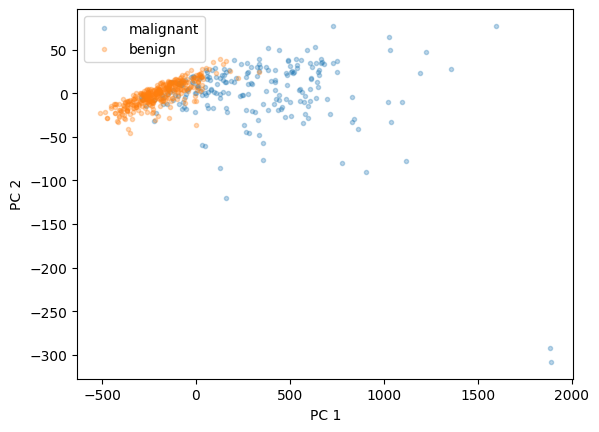

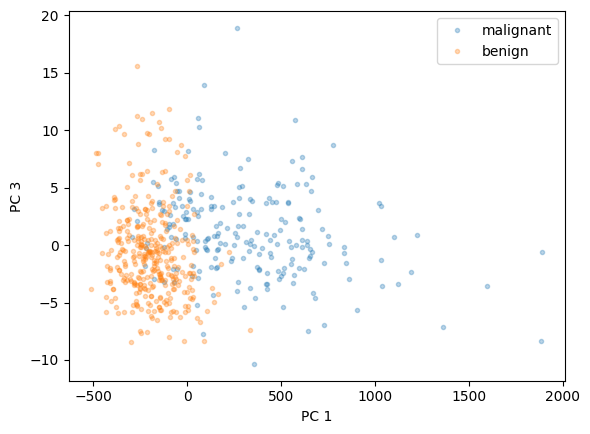

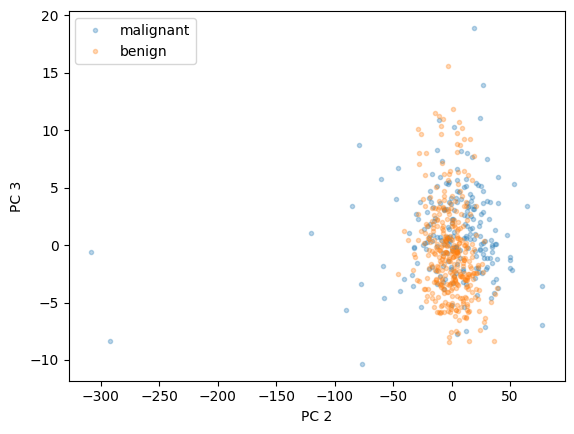

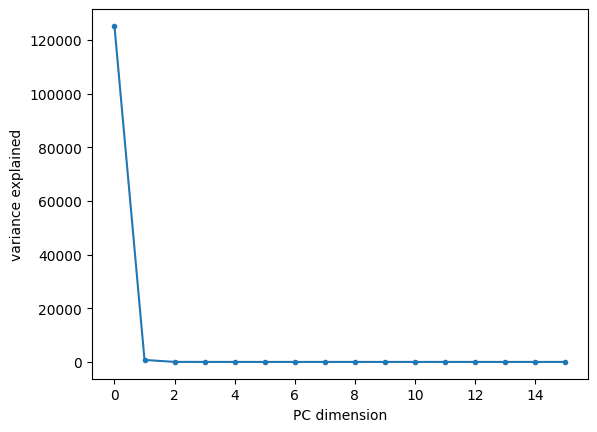

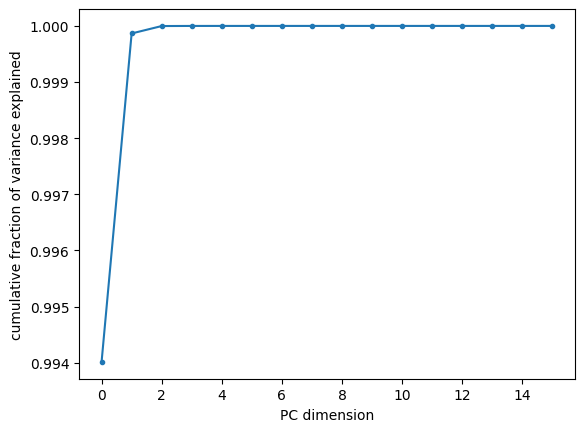

In [7]:
data = pd.read_csv('../datasets/breast_cancer_data/data_processed.csv')
print(data.shape)
# y includes our labels and x includes our features
y = data.diagnosis      # M or B 
list = ['diagnosis']
df = data.drop(list,axis = 1 )  # load data into a dataframe
X = df.values   # convert to a numpy array

pca = PCA()
pca.fit(X=X)

X_pc = pca.transform(X)
X_reconstruction_full = pca.reverse_transform(X_pc)
print("L1 reconstruction error for full PCA : %.4E " % (np.absolute(X - X_reconstruction_full).sum()))

for rank in range(X_pc.shape[1]+1):
    pca_lowrank = PCA(k=rank)
    pca_lowrank.fit(X=X)
    X_lowrank = pca_lowrank.transform(X)
    X_reconstruction = pca_lowrank.reverse_transform(X_lowrank)
    print("L1 reconstruction error for rank %i PCA : %.4E " % (rank, np.absolute(X - X_reconstruction).sum()))

# plt.ion()
fig = plt.figure()
plt.plot(X_pc[y=="M"][:,0], X_pc[y=="M"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="B"][:,0], X_pc[y=="B"][:,1],'.', alpha = 0.3)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(["malignant", "benign"])

fig2 = plt.figure()
plt.plot(X_pc[y=="M"][:,0], X_pc[y=="M"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="B"][:,0], X_pc[y=="B"][:,2],'.', alpha = 0.3)
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.legend(["malignant", "benign"])


fig3 = plt.figure()
plt.plot(X_pc[y=="M"][:,1], X_pc[y=="M"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="B"][:,1], X_pc[y=="B"][:,2],'.', alpha = 0.3)
plt.xlabel("PC 2")
plt.ylabel("PC 3")
plt.legend(["malignant", "benign"])

fig4 = plt.figure()
plt.plot(pca.variance_explained(),'.-')
plt.xlabel("PC dimension")
plt.ylabel("variance explained")

fig4 = plt.figure()
plt.plot(pca.variance_explained().cumsum() / pca.variance_explained().sum(),'.-')
plt.xlabel("PC dimension")
plt.ylabel("cumulative fraction of variance explained")

plt.show()

In the example below, we will use the PCA algorithm to reduce the dimensionality of a genetic dataset.  
After reducing the dimensionality, we will plot the results and examine whether clusters of ancestries are visible.  

We consider five ancestries in the dataset:  

- **EUR** - European  
- **AFR** - African  
- **EAS** - East Asian  
- **SAS** - South Asian  
- **AMR** - Admixed American  


In [10]:
snpreader = Bed('./../datasets/genetic_data/example2.bed', count_A1=True)
data = snpreader.read()
print(data.shape)
# y includes our labels and x includes our features
labels = pd.read_csv("./../datasets/genetic_data/1kg_annotations_edit.txt", sep="\t", index_col="Sample")
list1 = data.iid[:,1].tolist()  #list with the Sample numbers present in genetic dataset
labels = labels[labels.index.isin(list1)]  #filter labels DataFrame so it only contains the sampleIDs present in genetic data
y = labels.SuperPopulation  # EUR, AFR, AMR, EAS, SAS
X = data.val[:, ~np.isnan(data.val).any(axis=0)]  #load genetic data to X, removing NaN values


(267, 10626)


In [ ]:

pca = PCA()
pca.fit(X=X)

X_pc = pca.transform(X)
X_reconstruction_full = pca.reverse_transform(X_pc)
print("L1 reconstruction error for full PCA : %.4E " % (np.absolute(X - X_reconstruction_full).sum()))

for rank in range(5):    #more correct: X_pc.shape[1]+1
    pca_lowrank = PCA(k=rank)
    pca_lowrank.fit(X=X)
    X_lowrank = pca_lowrank.transform(X)
    X_reconstruction = pca_lowrank.reverse_transform(X_lowrank)
    print("L1 reconstruction error for rank %i PCA : %.4E " % (rank, np.absolute(X - X_reconstruction).sum()))


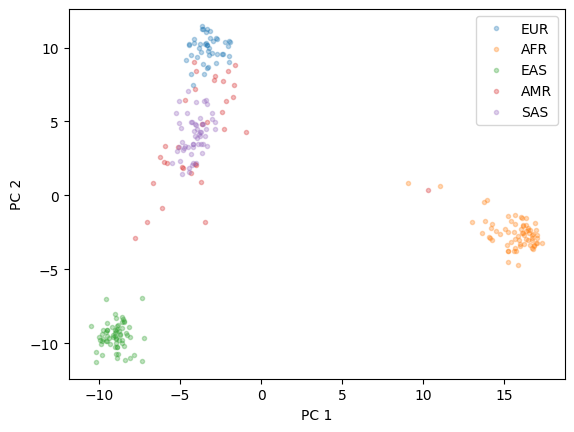

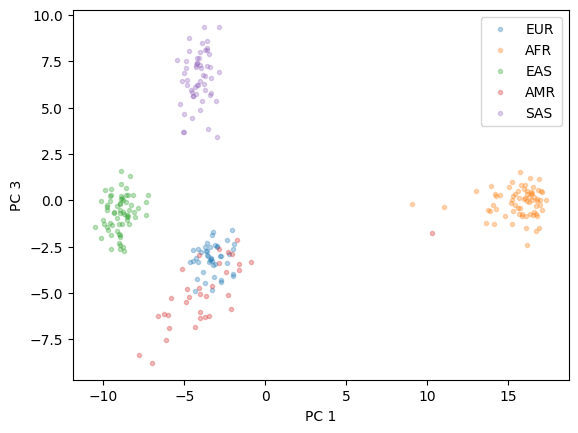

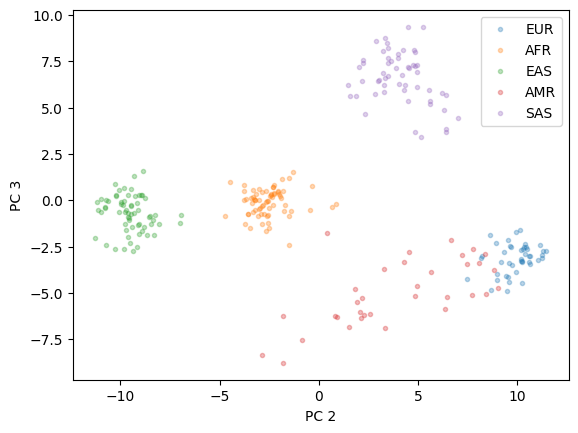

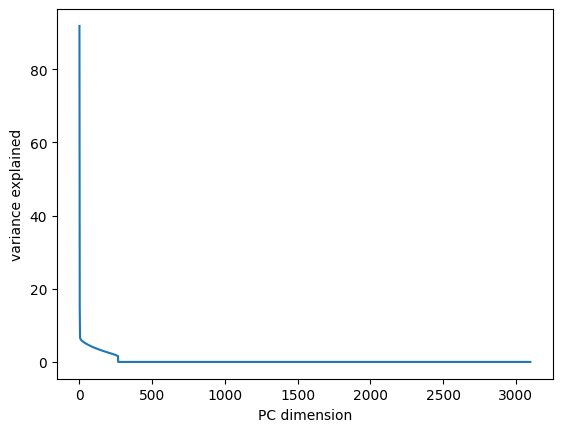

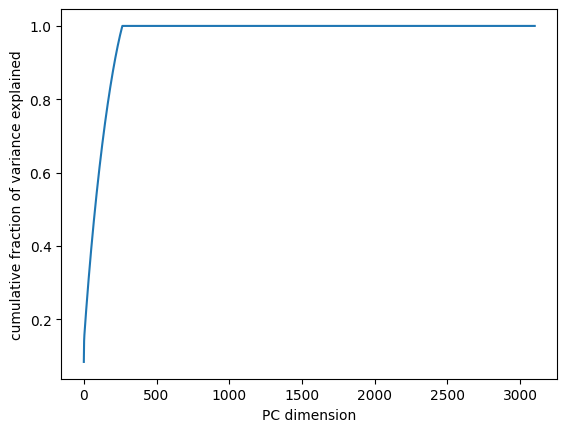

In [9]:

fig = plt.figure()
plt.plot(X_pc[y=="EUR"][:,0], X_pc[y=="EUR"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="AFR"][:,0], X_pc[y=="AFR"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="EAS"][:,0], X_pc[y=="EAS"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="AMR"][:,0], X_pc[y=="AMR"][:,1],'.', alpha = 0.3)
plt.plot(X_pc[y=="SAS"][:,0], X_pc[y=="SAS"][:,1],'.', alpha = 0.3)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(["EUR", "AFR","EAS","AMR","SAS"])

fig2 = plt.figure()
plt.plot(X_pc[y=="EUR"][:,0], X_pc[y=="EUR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="AFR"][:,0], X_pc[y=="AFR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="EAS"][:,0], X_pc[y=="EAS"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="AMR"][:,0], X_pc[y=="AMR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="SAS"][:,0], X_pc[y=="SAS"][:,2],'.', alpha = 0.3)
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.legend(["EUR", "AFR","EAS","AMR","SAS"])


fig3 = plt.figure()
plt.plot(X_pc[y=="EUR"][:,1], X_pc[y=="EUR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="AFR"][:,1], X_pc[y=="AFR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="EAS"][:,1], X_pc[y=="EAS"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="AMR"][:,1], X_pc[y=="AMR"][:,2],'.', alpha = 0.3)
plt.plot(X_pc[y=="SAS"][:,1], X_pc[y=="SAS"][:,2],'.', alpha = 0.3)
plt.xlabel("PC 2")
plt.ylabel("PC 3")
plt.legend(["EUR", "AFR","EAS","AMR","SAS"])

fig4 = plt.figure()
plt.plot(pca.variance_explained())
plt.xlabel("PC dimension")
plt.ylabel("variance explained")

fig4 = plt.figure()
plt.plot(pca.variance_explained().cumsum() / pca.variance_explained().sum())
plt.xlabel("PC dimension")
plt.ylabel("cumulative fraction of variance explained")
plt.show()

